#Testing Gait Cycle Extraction Method

The purpose of this notebook is to test our method for extracting gait cycles to determine how effective it is.

In [1]:
%matplotlib inline
%precision 3
import numpy as np
import scipy
import ReadCsvs as rc
import thinkstats2
import thinkplot
import GaitCycleFunc as gcf

/Users/jpoh/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/jpoh/anaconda/lib/python2.7/argparse.pyc, but /Users/jpoh/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [2]:
AFO, PPAFO, Shoes=rc.ReadGaitData()

Sub001_6MW_AFO_0001.mat
Sub001_6MW_AFO_0002.mat
Sub001_6MW_AFO_0003.mat
Sub001_6MW_AFO_0004.mat
Sub001_6MW_AFO_0005.mat
Sub001_6MW_AFO_0006.mat
Sub001_6MW_AFO_0007.mat
Sub001_6MW_AFO_0008.mat
Sub001_6MW_AFO_0009.mat
Sub001_6MW_PPAFO_0001.mat
Sub001_6MW_PPAFO_0002.mat
Sub001_6MW_PPAFO_0003.mat
Sub001_6MW_PPAFO_0004.mat
Sub001_6MW_PPAFO_0005.mat
Sub001_6MW_PPAFO_0006.mat
Sub001_6MW_PPAFO_0007.mat
Sub001_6MW_PPAFO_0008.mat
Sub001_6MW_PPAFO_0009.mat
Sub001_6MW_Shoes_0001.mat
Sub001_6MW_Shoes_0002.mat
Sub001_6MW_Shoes_0003.mat
Sub001_6MW_Shoes_0004.mat
Sub001_6MW_Shoes_0005.mat
Sub001_6MW_Shoes_0006.mat
Sub001_6MW_Shoes_0007.mat
Sub001_6MW_Shoes_0008.mat
Sub001_6MW_Shoes_0009.mat
Sub002_6MW_AFO_0001.mat
Sub002_6MW_AFO_0002.mat
Sub002_6MW_AFO_0003.mat
Sub002_6MW_AFO_0004.mat
Sub002_6MW_AFO_0005.mat
Sub002_6MW_AFO_0006.mat
Sub002_6MW_AFO_0007.mat
Sub002_6MW_AFO_0008.mat
Sub002_6MW_AFO_0009.mat
Sub002_6MW_PPAFO_0001.mat
Sub002_6MW_PPAFO_0002.mat
Sub002_6MW_PPAFO_0003.mat
Sub002_6MW_PPAFO_0004.

###Define Function for Gait Cycle Extraction

In [33]:
def CycleExtract(fw, data, pnum, trial, plane, marker, plot):
    
    strike_charac, strike_loc = gcf.HeelStrike(fw, data, pnum, trial, marker, False)

    num_cycles=len(strike_charac)

    dataframe=AFO[pnum].GetTrial(trial).GetData(plane)

    cycle_set=[]

    for i in range(num_cycles-1):
    
        start_rowindex=strike_charac[i][0]
        end_rowindex=strike_charac[i+1][0]
    
        cycle=dataframe[start_rowindex : end_rowindex]
        index=range(start_rowindex, end_rowindex, 1)
    
        cycle_set.append((index, cycle))
    
    if plot==True:
        for j in range(len(cycle_set)):
    
            index, cycle=cycle_set[j]
             
            thinkplot.Plot(dataframe['R_HEEL'], color='blue', label='Right full set')
            thinkplot.Plot(index, cycle['R_HEEL'], color='red', label='Right cycle set')  
            thinkplot.Show(legend=True)
            
            thinkplot.Plot(dataframe['L_HEEL'], color='blue', label='Left full set')
            thinkplot.Plot(index, cycle['L_HEEL'], color='red', label='Left cycle set')  
            thinkplot.Show(legend=True)
            
    return cycle_set

###Test Function Definition

Using L_HEEL marker
[[112, 7333.6092733366213], [556, 6449.519298360352], [1117, 6750.4888152876929]] [0.755, 2.9750000000000001, 5.7800000000000002] [66.709055287895694, 66.980535466219862, 60.358564039240463]


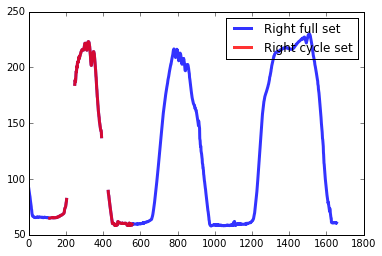

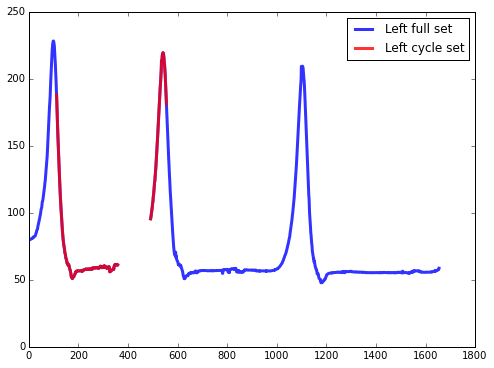

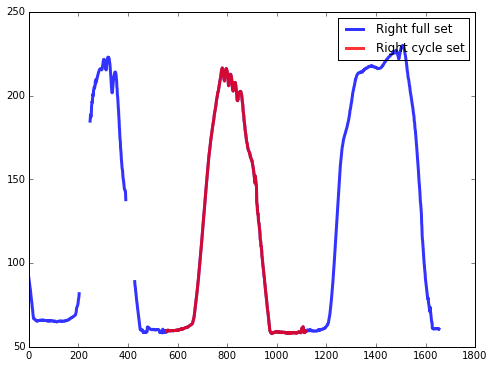

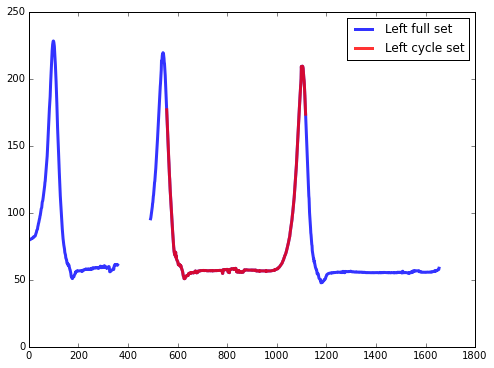

Using R_HEEL marker
[[919, 2642.7943765937071], [1578, 3795.2221014702191]] [4.79, 8.0850000000000009] [78.934225273020232, 72.304789802364581]


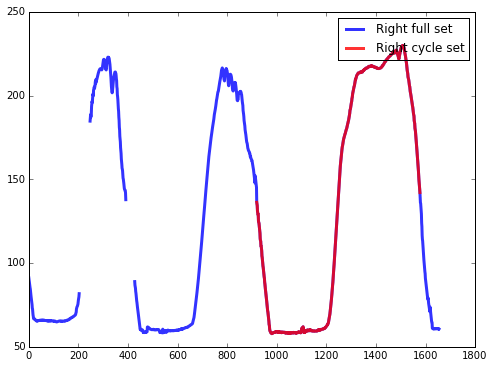

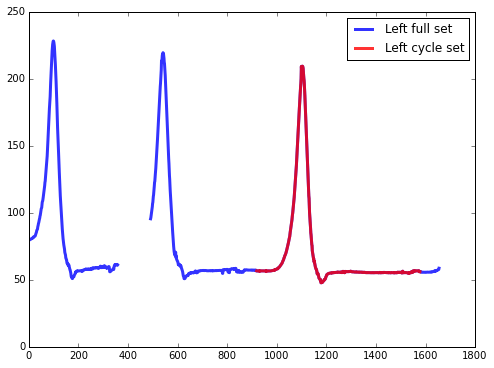

In [35]:
data=[AFO, PPAFO, Shoes]

pnum=4
trial=4
fw='AFO'
plot=True
plane='z'

print "Using L_HEEL marker"
cycle_set=CycleExtract(fw, data, pnum, trial, plane, 'L_HEEL', plot)
print "Using R_HEEL marker"
cycle_set2=CycleExtract(fw, data, pnum, trial, plane, 'R_HEEL', plot)

###Test Symmetry Based on Gait Cycles

[[919, 2642.7943765937071], [1578, 3795.2221014702191]] [4.79, 8.0850000000000009] [78.934225273020232, 72.304789802364581]


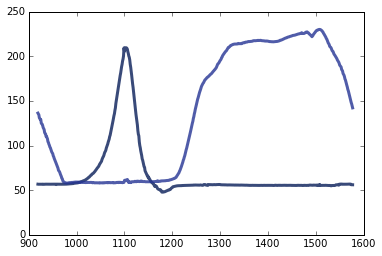

In [28]:
pnum=4
trial=4
fw='AFO'
plot=True
plane='z'

cycle_set=CycleExtract(fw, data, pnum, trial, plane, False)

for i in range(len(cycle_set)):
    index, cycle=cycle_set[i]
    lheeldata=cycle['L_HEEL']
    rheeldata=cycle['R_HEEL']

    thinkplot.Plot(lheeldata)
    thinkplot.Plot(rheeldata)
    thinkplot.Show(legend=False)